In [6]:
# Read performance json files 
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from utils import pareto_compare_plots, pareto_multicompare_plots, method_nice
from glob import glob
import pdb
import json
from tqdm import tqdm 
from collections import namedtuple
import numpy as np 

perf = namedtuple('perf',['method','dataset','seed'])
# rdir = 'results_r7'
rdirs = [
#     '../results_23-02-07/', 
#    '../results/Run_2/results_combined/', 
#     '../fair_gp/analysis/results/'
    '../results/Run_6/results_combined'
]
performances = {} 
methods = set()
datasets = set()
seeds = set()
seedcount = {}
from pathlib import Path
# for f in tqdm(glob(rdir+'/*.json')):
for rdir in rdirs:
    for f in Path(rdir).rglob('*.json'):

        with open(f) as fh:
            a = json.load(fh)
            method = a[0]['method']
            dataset = a[0]['dataset']
            seed = a[0]['seed']
            performances.update({perf(method,dataset,seed): a})
            methods.add(method)
            datasets.add(dataset)
            seeds.add(seed)
            if seed in seedcount:
                seedcount[seed] += 1
            else:
                seedcount[seed] = 1
        
print('methods:',methods)
print('datasets:',datasets)
print('seeds:',seeds)
all_methods = methods

17
30
13
37
54
21
28
35
29
18
4
72
31
21
24
28
100
18
73
24
12
26
6
19
10
23
18
71
22
19
26
100
18
3
7
5
33
9
10
3
4
20
34
18
100
4
9
21
13
100
12
22
100
16
9
16
54
18
12
10
10
3
17
9
13
7
3
5
8
37
100
14
28
18
21
33
29
13
100
33
29
16
22
20
46
46
13
13
20
13
5
21
5
46
23
6
100
6
31
100
6
100
18
14
11
24
6
26
9
19
5
20
4
21
14
45
5
28
23
12
69
100
39
8
12
36
23
19
23
6
100
4
19
5
6
36
7
10
5
32
7
42
36
3
1
100
100
40
18
7
22
50
9
25
100
5
5
49
10
60
11
12
22
20
100
23
12
18
23
30
27
21
28
100
9
100
100
25
15
14
7
33
43
42
5
11
30
2
21
19
25
14
29
45
44
12
22
18
100
9
7
19
27
42
21
29
13
7
3
31
17
100
9
11
24
2
37
100
100
16
15
100
13
13
11
6
24
27
6
100
11
4
62
11
81
9
15
8
36
100
2
4
100
1
25
11
13
24
100
33
27
25
9
8
25
20
21
4
2
20
6
25
4
20
100
2
4
12
4
7
16
5
25
27
35
6
5
16
8
98
100
36
31
14
46
18
47
100
6
64
15
31
100
6
100
33
31
13
4
19
100
24
26
100
27
100
9
50
11
7
7
22
7
100
13
13
30
20
22
7
20
14
9
2
5
18
19
20
50
26
14
9
34
29
78
100
24
100
28
19
29
16
15
3
5
2
14
28
24
22

In [4]:
# #rows = #methods * #datasets * #seeds
import pandas as pd
frames = []
for k,v in performances.items():
    frame = dict(
        method = k.method,
        dataset = k.dataset,
        seed = k.seed
    )
    frames.append(frame)
#     if k.method in summary.keys():
#         summary[k.method].append({k.seed: k.dataset})
#     else:
#         summary[k.method] = list({k.seed: k.dataset})
# summary
df = pd.DataFrame(frames)
df

,method,dataset,seed
0,fomo_flex_xgb_fnr,mimic4,10197
1,fomo_lex_lr_fnr_linear,communities,14724
2,fomo_lex_lr_fnr_mlp,student,12498
3,fomo_nsga2_lr_fnr,student,14724
4,fomo_flex_lr_fnr_linear,mimic4,19863
...,...,...,...
2245,fomo_nsga2_xgb_fnr_mlp,communities,8233
2246,fomo_nsga2_xgb_fnr_linear,adult,29756
2247,fomo_flex_lr_fnr_linear,student,29756
2248,fomo_lex_lr_fnr_linear,communities,24481


In [ ]:
for method,dfg in df.groupby('method'):
    display(dfg.value_counts())

In [ ]:
df.groupby(['method','seed'])['dataset'].value_counts().unstack()

In [ ]:
# plot pareto plot for one specific method, dataset and seed

from utils import pareto_plots
pareto_plots(performances[perf('fomo_lex_xgb_fnr_mlp','adult',14724)])

In [ ]:
# Compare pareto plots for 2 specific performances
# Also returns pareto plot of the combined solutions (both models, test)
from itertools import combinations
import matplotlib.pyplot as plt
i = 0
# for m1,m2 in combinations(methods,2):
m1,m2 = ('fomo_lex_xgb_fnr_mlp','fomo_lex_xgb_fnr_linear')
#     for d in datasets:
for d in ['adult']:
#    for s in seeds:
    for s in [14724]: 
        if perf(m1,d,s) in performances.keys() and perf(m2,d,s) in performances.keys():
            h = pareto_compare_plots(performances[perf(m1,d,s)],
                                 performances[perf(m2,d,s)],
                                 d)
            i += 1
#                 plt.close(h)

In [ ]:
from utils import pareto_plot
# p= performances[perf('gerryfair_lr_fnr','adult',10197)]
p= performances[perf('fomo_lex_xgb_fnr_mlp','adult',14724)]
# p= performances[perf('fomo_nsga2_lr_fpr','adult',10197)]

pareto_plot(
    p,
#    'auditor_fp_violation',
#    'auc_roc',
    'subgroup_fnr',
     'accuracy',
    
     'Subgroup FNR',
#    'AUROC',
    '1-accuracy',
    reverse_x = False, 
    reverse_y = True
)
fp, acc, auroc = [], [] ,[]
mae = []
for m in p:
    print(
        m['model'],
        m['test']['mae'],
#         m['train']['auditor_fp_violation'],
        m['test']['subgroup_fnr'],
#         m['train']['auc_roc']
    )
    model = m['model']
    fold = 'test'
    fp.append(m[fold]['subgroup_fnr'])
    mae.append(m[fold]['mae'])
    acc.append(m[fold]['accuracy'])
    auroc.append(m[fold]['auc_roc'])
mae = np.asarray(mae)
fp = np.asarray(fp)
acc = np.asarray(acc)
auroc = np.asarray(auroc)
s = np.argsort(fp)
# plt.plot(fp[s],[-a for a in auroc[s]],'--x')
plt.plot(fp[s],1-acc[s],'-g')


In [8]:
from utils import fair_metrics, loss_metrics, reverse_metrics, front
from itertools import chain
import numpy as np

def pareto_multicompare_plot(perfs, dataset_name,xname,yname,xname_nice,
        yname_nice, reverse_x = False, reverse_y = False, rdir='', h = None, count =0,
                             fold='test', trial=0
                            ):

    if h == None:
        h = plt.figure(figsize=(12,12))
    plt.gca().grid(True,axis='both')
    
    models = [p[0]['method'] for p in perfs]
    # keep only relevant models (based on FPR/FNR)
    metric_type = 'fnr' if 'fn' in xname else 'fpr'
    models = [m for m in models]
    # sort results by name
    s = np.argsort([method_nice[m] for m in models])
    models = [models[i] for i in s]
    perfs = [perfs[i] for i in s]
   
#     print('models:',models)
    seed = perfs[0][0]['seed']
    for p in perfs:
        assert seed == p[0]['seed'] 
    seed = str(seed)
    
#     x_vals = {m:{'train':[], 'test':[]} for m in models}
#     y_vals = {m:{'train':[], 'test':[]} for m in models}
    
    x_vals = {m:[] for m in models}
    y_vals = {m:[] for m in models}
    
    for perf,m in zip(perfs,models):
        for i,p in enumerate(perf):
            x_vals[m].append(p[fold][xname])
            y_vals[m].append(p[fold][yname])
        
    if reverse_x: 
#         print('reversing x for ',xname)
        for m in models:
#             for t in ['train','test']:
            x_vals[m] = [1-x for x in x_vals[m]]
    if reverse_y: 
#         print('reversing y for ',yname)
        for m in models:
#             for t in ['train','test']:
            y_vals[m] = [1-y for y in y_vals[m]]
            
    # get pareto front
    pf_x = {}
    pf_y = {}
    for m in models:
        s = np.argsort(x_vals[m])
        x_vals[m] = np.array(x_vals[m])[s]
        y_vals[m] = np.array(y_vals[m])[s]
        
        pf_tmp = front(x_vals[m],y_vals[m])
        pf_x[m] = [x_vals[m][i] for i in pf_tmp]
        pf_y[m] = [y_vals[m][i] for i in pf_tmp]
        
#     # get the pareto front of the combined solutions
    all_x_vals = list(chain.from_iterable( x_vals[m] for m in models))
# #     all_x_vals_test = [ x_vals[m]['test'] for m in models]
    all_y_vals = list(chain.from_iterable( y_vals[m] for m in models))
# #     all_y_vals_test = [ y_vals[m]['test'] for m in models]
# #     print('all_x_vals_test:',all_x_vals_test)
# #     print('all_y_vals_test:',all_y_vals_test)
    PF = front(all_x_vals,all_y_vals)
    pf_x_vals = [all_x_vals[i] for i in PF]
    pf_y_vals = [all_y_vals[i] for i in PF]
    
#     for m in models:
# #         for t in ['train','test']:
#         x_vals[m] = np.array(x_vals[m])
#         y_vals[m] = np.array(y_vals[m])
            
#     pf_x = {}
#     pf_y = {}
#     for m in models:
#         pf_x[m] = [] #{'train':[],'test':[]}
#         pf_y[m] = [] #{'train':[],'test':[]}
# #         for t in ['train','test']:
#         pf_tmp = front(x_vals[m],y_vals[m])
#         pf_x[m] = [x_vals[m][i] for i in pf_tmp]
#         pf_y[m] = [y_vals[m][i] for i in pf_tmp]
            
    # make plots!
        
#     # pareto front line
    plt.plot(
        pf_x_vals, 
        pf_y_vals, 
        '-k', 
        linewidth=4,
        alpha=0.1, 
        label= '_no_legend'
    )
    cmap = plt.cm.get_cmap('tab20',len(models))
#     cmap = plt.cm.get_cmap('tab20',20)
    markers = ['x','s','^','d','*','+','v','>','<','D']*10
#     pdb.set_trace()
    for c,m in enumerate(models):
#         print(m)
#         plt.plot(
#             x_vals[m],
#             y_vals[m],
#             linestyle='',
#             marker=markers[c],
#             color=cmap(c),
#             # markerfacecolor='none',
#             # label=method_nice[m],
#             label=m,
#             # label='_no_legend',
#             alpha=1.0
#         )
        x = np.asarray(pf_x[m])
        y = np.asarray(pf_y[m])
        plt.plot(
#             x+np.random.normal(0,.001*np.mean(x)),
#             y+np.random.normal(0,.001*np.mean(y)),
            x,
            y,
            markers[c],
            color=cmap(c),
            markeredgecolor='k' if markers[c] not in ['x','+'] else cmap(c),
#             color=cmap(trial),
            linestyle='--',
            # markerfacecolor='none',
            label=method_nice[m],
#             label=m,
            # label='_no_legend',
            alpha=0.8
        )
#         plt.plot(
#             pf_x[m],
#             pf_y[m],
#             '--',
#             color=cmap(c),
#             label='_no_legend',
#             alpha=0.7
#         )
   
#     print('PF:',PF)
    plt.scatter(
        pf_x_vals, 
        pf_y_vals, 
        marker='o', 
        facecolors='none',
        edgecolor='k', 
        s=200, 
        label= 'Pareto front',
        alpha=0.5
    )
#     plt.gca().set_xscale('log')
#     plt.gca().set_yscale('log')
#     for i in np.arange(len(x_vals['train'])):
#         plt.plot([x_vals[fold][i] for t in ['train','test']],
#                  [y_vals[fold][i] for t in ['train','test']],
#                  ':',alpha=0.5,label='_no_legend')
    leg = plt.legend(loc=[1.01, 0.1])

    plt.title(f'dataset = {dataset_name} ') #| Trial {trial}')
    plt.xlabel(xname_nice)
    plt.ylabel(yname_nice)

    plt.tight_layout()
    if not os.path.exists(FIGDIR+rdir):
        os.makedirs(FIGDIR+rdir, exist_ok=True)
        
#     plt.gca().set_xscale('log')
#     plt.gca().set_yscale('log')
    savename = (
        FIGDIR+rdir
        +'/pareto_multicompare_'+xname+'-'+yname+'_'
        #+'_'+'-'.join([m for m in models])
        +'nsga2'
        +f'_all_models'
        +f'_{fold}'
        +'_'+dataset_name
        +f'_{trial}'
    )
    print('saving ',savename)
    for ending in ['.png']:
        plt.savefig(savename + ending, 
                    #bbox_extras=[leg], 
                    dpi=400)
    
    # return hypervolumes 
    return h

def pareto_multicompare_plots(perfs, dataset_name, fm = fair_metrics,
        lm = loss_metrics, rdir='', h=None, trial=0):
    for f,flabel in fm.items():
        for L,Llabel in lm.items():
            pareto_multicompare_plot(perfs, dataset_name, f, L, flabel, Llabel,
                               reverse_y = L in reverse_metrics, rdir=rdir, h=h, trial=trial)


/tmp/ipykernel_2072/944063531.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20',len(models))


saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_0


/tmp/ipykernel_2072/944063531.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20',len(models))


saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_1
saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_2
saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_3
saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_4
saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_5
saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_6
saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_7
saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_8
saving  figs6/pa

/tmp/ipykernel_2072/3351426171.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  h = plt.figure(figsize=(6,4))


saving  figs6/pareto/combined_comparison/student/pareto_multicompare_subgroup_fnr-accuracy_nsga2_all_models_test_student_20


KeyboardInterrupt: 

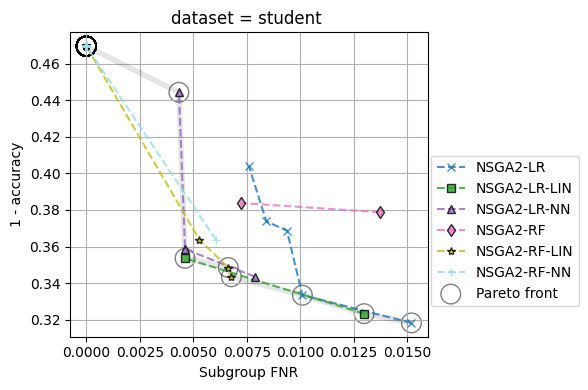

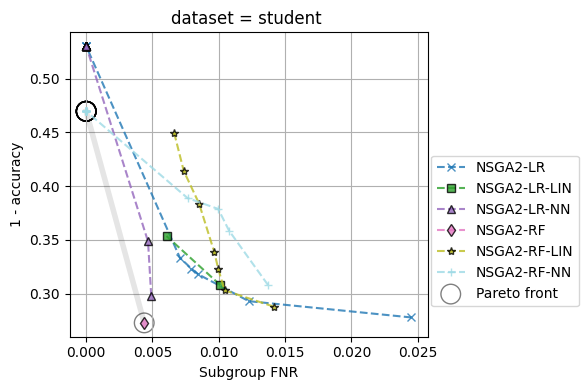

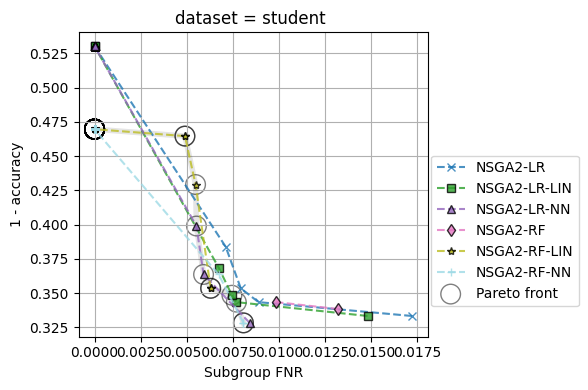

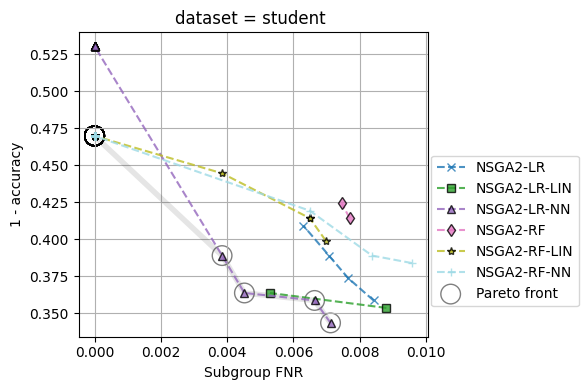

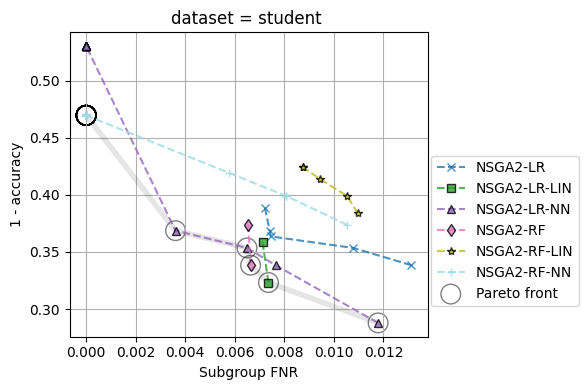

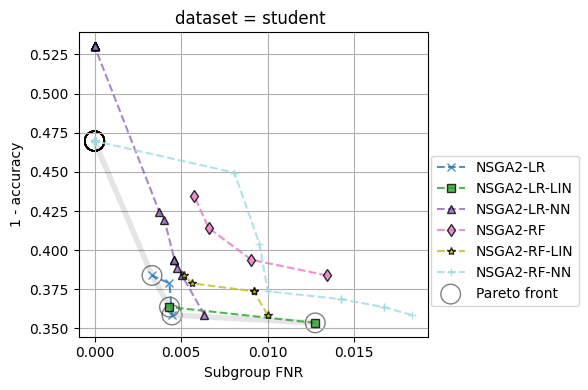

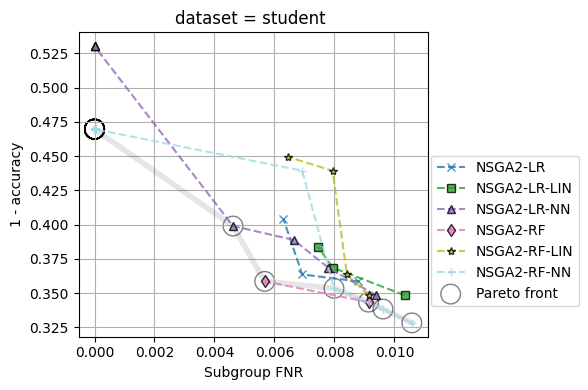

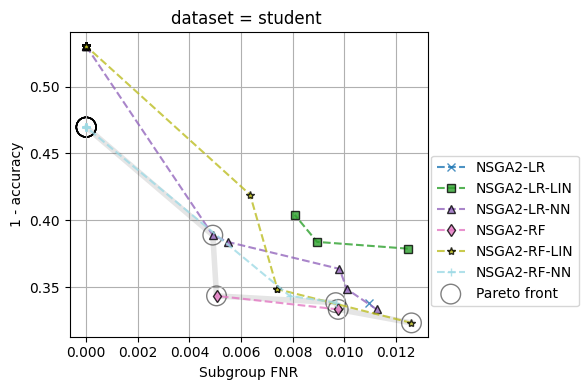

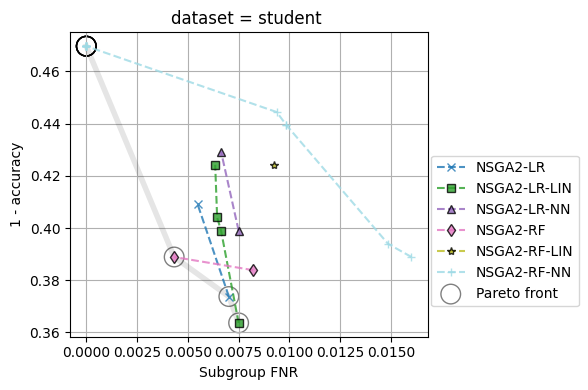

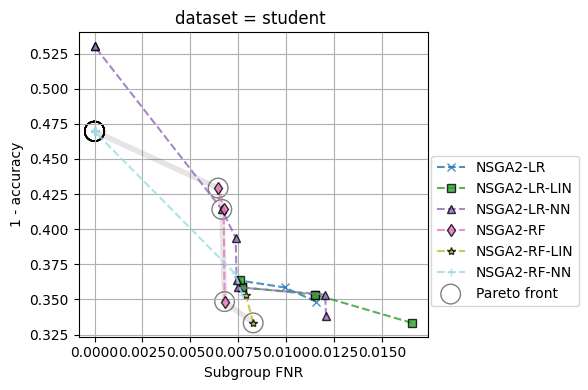

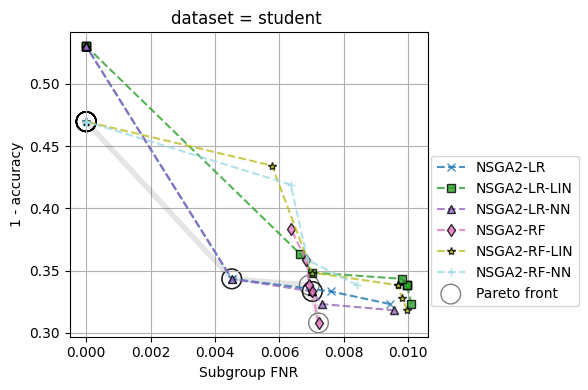

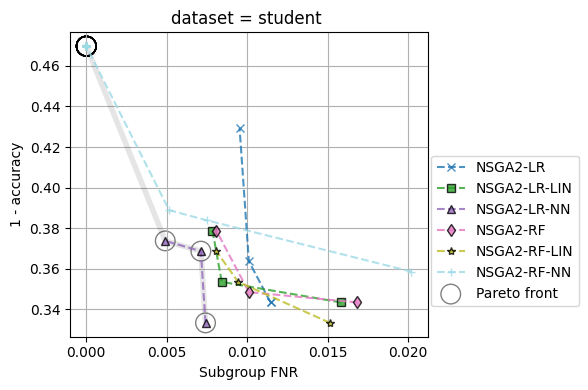

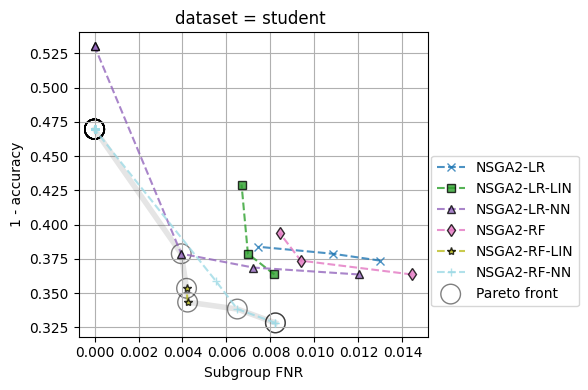

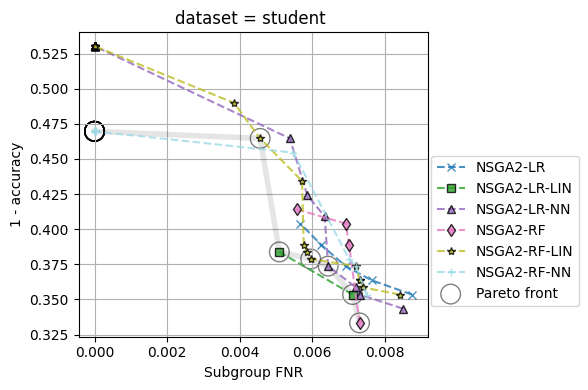

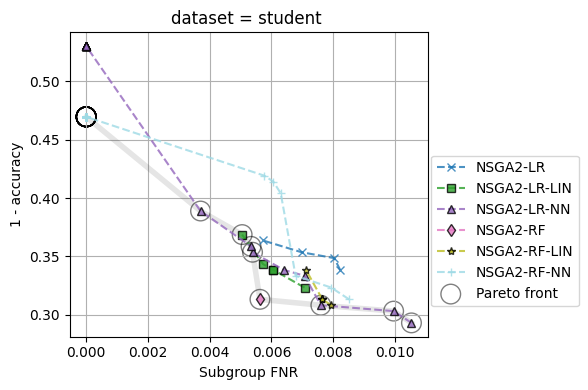

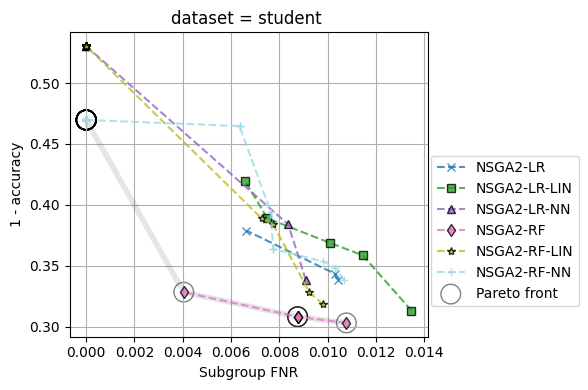

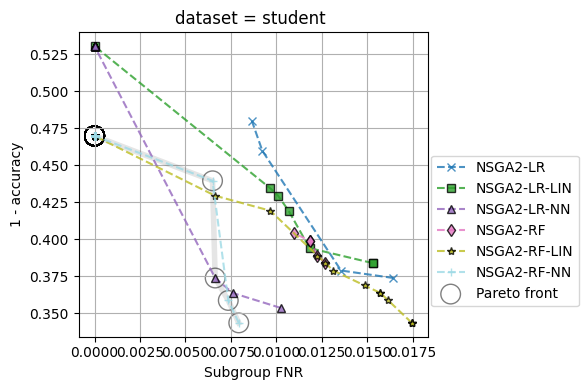

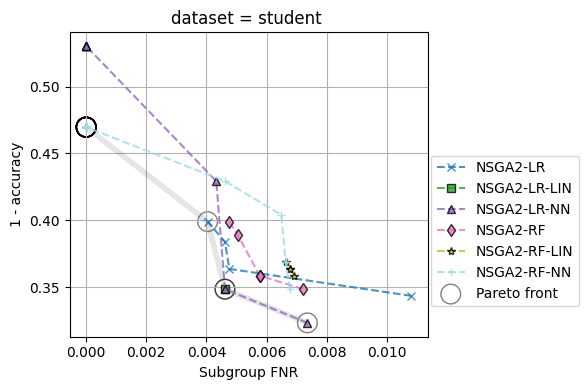

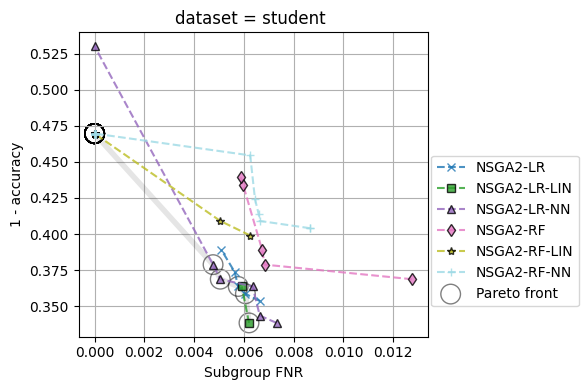

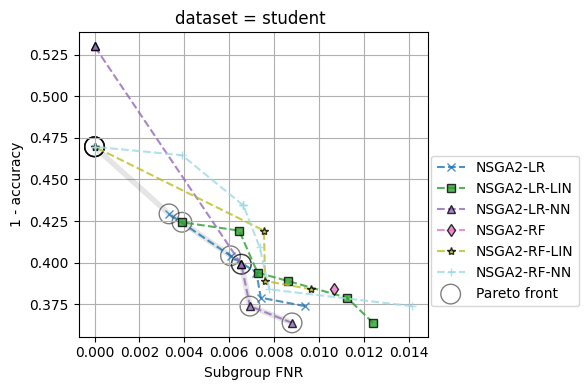

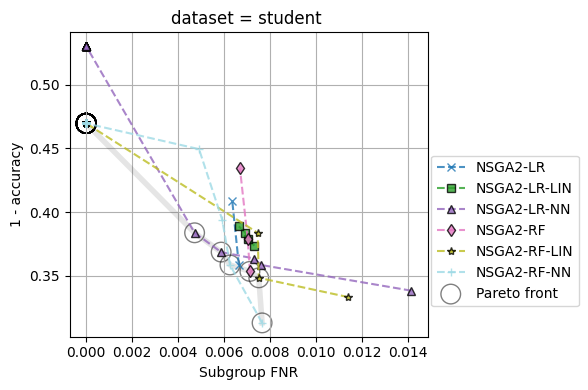

In [9]:
from itertools import combinations
import matplotlib.pyplot as plt
import os
import ipdb
%matplotlib inline
FIGDIR = 'figs6/pareto/'
# fm = {k:v for k,v in fair_metrics.items() if 'subgroup' in k}
lm = {k:v for k,v in loss_metrics.items() if k in ['accuracy']}
fm = {
#     'auditor_fp_violation':'Auditor FP violation',
#    'subgroup_fpr':'Subgroup FPR',
    'subgroup_fnr':'Subgroup FNR',
}
lm = {
#     'mae':'MAE',
#     'auc_roc':'1-AUROC',
     'accuracy':'1 - accuracy'  
     }
# methods = [
#     'fomo_nsga2_lr_fpr',
#     'gerryfair_lr_fpr'
# ]
methods = {elem for elem in all_methods if 'nsga2' in elem}
countmax = 100
# for ml in ['lr','xgb']:
# for d in datasets:
#     if d in ['lsac_bar','communities','adult','lawschoo']: continue
for d in ['student','communities','lawschool', 'adult']:
# for d in ['lsac_bar']:
    for f,flabel in fm.items():
#     for f,flabel in fair_metrics.items():
#         for L,Llabel in loss_metrics.items():
        for L,Llabel in lm.items():
            count = 0
            for s in seeds:
                h = plt.figure(figsize=(6,4))
                if count >= countmax:
                    break
                keepgoing = True
                perfs = []
                for m in methods:
                    if perf(m,d,s) in performances.keys(): 
                        perfs.append(perf(m,d,s))
                    else:
                        keepgoing=False
#                 keepgoing=True
#                 if keepgoing:
                if len(perfs)>4:
                    pareto_multicompare_plot(
                        [performances[p] for p in perfs], 
                        d, 
                        f, 
                        L,
                        flabel,
                        Llabel,
                        reverse_y = L in reverse_metrics,
                        rdir='combined_comparison/'+f'{d}',
                        h = h,
                        fold='test',
                        trial=count
                    )
                    count += 1



In [ ]:
some_methods = {elem for elem in all_methods if 'flex' in elem}
some_methods